In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

# Note: you can only unzip a zipped tuple once before it is removed
#       from the computer's memory. Make sure unzip the latitudes and 
#       longitudes into the coordinates list before moving on. 

## 6.1.5 Generate Random World Cities

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []

# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count.
len(cities)

605

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import the datetime module from the datetime library.
from datetime import datetime

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [8]:
# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval      ")
print("------------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval      
------------------------------


In [9]:
# Loop through all the cities in our list.
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")
    
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 2 of Set 1 | haines junction
Processing Record 3 of Set 1 | kavieng
Processing Record 4 of Set 1 | bluff
Processing Record 5 of Set 1 | pevek
Processing Record 6 of Set 1 | ostrovnoy
Processing Record 7 of Set 1 | chuy
Processing Record 8 of Set 1 | harper
Processing Record 9 of Set 1 | nikolskoye
Processing Record 10 of Set 1 | hobyo
Processing Record 11 of Set 1 | menongue
Processing Record 12 of Set 1 | yellowknife
Processing Record 13 of Set 1 | yerbogachen
Processing Record 14 of Set 1 | mataura
Processing Record 15 of Set 1 | arraial do cabo
Processing Record 16 of Set 1 | vaini
Processing Record 17 of Set 1 | owando
Processing Record 18 of Set 1 | chernyshevskiy
Processing Record 19 of Set 1 | plavsk
Processing Record 20 of Set 1 | berlevag
Processing Record 21 of Set 1 | ponta do sol
Processing Record 22 of Set 1 | ilhabela
Processing Record 23 of Set 1 | conde
Processing Record 24 of Set 1

Processing Record 37 of Set 4 | xining
Processing Record 38 of Set 4 | coihaique
Processing Record 39 of Set 4 | west wendover
Processing Record 40 of Set 4 | garissa
Processing Record 41 of Set 4 | virginia beach
Processing Record 42 of Set 4 | la ligua
Processing Record 43 of Set 4 | westport
Processing Record 44 of Set 4 | samur
Processing Record 45 of Set 4 | namibe
Processing Record 46 of Set 4 | bandarbeyla
Processing Record 47 of Set 4 | tuy hoa
Processing Record 48 of Set 4 | moerai
Processing Record 49 of Set 4 | matagami
Processing Record 50 of Set 4 | dikson
Processing Record 1 of Set 5 | gat
Processing Record 2 of Set 5 | aswan
Processing Record 3 of Set 5 | seoul
Processing Record 4 of Set 5 | bontang
Processing Record 5 of Set 5 | ciudad bolivar
Processing Record 6 of Set 5 | puerto escondido
Processing Record 7 of Set 5 | papar
Processing Record 8 of Set 5 | henties bay
Processing Record 9 of Set 5 | takoradi
Processing Record 10 of Set 5 | hualmay
Processing Record 11 o

Processing Record 30 of Set 8 | englewood
Processing Record 31 of Set 8 | umm kaddadah
Processing Record 32 of Set 8 | eydhafushi
Processing Record 33 of Set 8 | deloraine
Processing Record 34 of Set 8 | erzurum
Processing Record 35 of Set 8 | birin
Processing Record 36 of Set 8 | erenhot
Processing Record 37 of Set 8 | alekseyevsk
Processing Record 38 of Set 8 | alyangula
Processing Record 39 of Set 8 | fallon
Processing Record 40 of Set 8 | constitucion
Processing Record 41 of Set 8 | wampusirpi
City not found. Skipping...
Processing Record 42 of Set 8 | yakeshi
Processing Record 43 of Set 8 | denpasar
Processing Record 44 of Set 8 | hays
Processing Record 45 of Set 8 | vagur
Processing Record 46 of Set 8 | xuanwu
Processing Record 47 of Set 8 | ust-tsilma
Processing Record 48 of Set 8 | cherskiy
Processing Record 49 of Set 8 | raudeberg
Processing Record 50 of Set 8 | kapuskasing
Processing Record 1 of Set 9 | shelburne
Processing Record 2 of Set 9 | miyako
Processing Record 3 of Se

Processing Record 15 of Set 12 | manosque
Processing Record 16 of Set 12 | ondorhaan
City not found. Skipping...
Processing Record 17 of Set 12 | guanica
Processing Record 18 of Set 12 | vestmannaeyjar
Processing Record 19 of Set 12 | trelew
Processing Record 20 of Set 12 | bonoua
Processing Record 21 of Set 12 | barcelos
Processing Record 22 of Set 12 | izhma
Processing Record 23 of Set 12 | ahipara
Processing Record 24 of Set 12 | matsanga
City not found. Skipping...
Processing Record 25 of Set 12 | kahului
Processing Record 26 of Set 12 | honningsvag
Processing Record 27 of Set 12 | caluquembe
Processing Record 28 of Set 12 | orbetello
Processing Record 29 of Set 12 | lovozero
Processing Record 30 of Set 12 | severomuysk
Processing Record 31 of Set 12 | caronport
Processing Record 32 of Set 12 | kutum
Processing Record 33 of Set 12 | ngukurr
City not found. Skipping...
Processing Record 34 of Set 12 | ellisras
Processing Record 35 of Set 12 | cajnice
Processing Record 36 of Set 12 |

## 6.2.7 Create a DataFrame of City Weather Data

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Haines Junction,60.7522,-137.5108,-0.40,85,100,1.72,CA,2021-04-03 12:35:12
1,Kavieng,-2.5744,150.7967,82.62,76,39,6.98,PG,2021-04-03 12:35:12
2,Bluff,-46.6000,168.3333,57.99,50,83,11.99,NZ,2021-04-03 12:35:12
3,Pevek,69.7008,170.3133,-24.14,97,37,2.30,RU,2021-04-03 12:35:13
4,Ostrovnoy,68.0531,39.5131,28.26,88,33,8.97,RU,2021-04-03 12:35:13
5,Chuy,-33.6971,-53.4616,71.60,62,5,5.14,UY,2021-04-03 12:35:13
6,Harper,4.3750,-7.7169,85.53,66,86,6.64,LR,2021-04-03 12:35:13
7,Nikolskoye,59.7035,30.7861,41.00,70,40,11.18,RU,2021-04-03 12:35:14
8,Hobyo,5.3505,48.5268,86.52,61,12,13.29,SO,2021-04-03 12:35:14
9,Menongue,-14.6585,17.6910,74.55,65,100,5.48,AO,2021-04-03 12:35:14


In [13]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Haines Junction,CA,2021-04-03 12:35:12,60.7522,-137.5108,-0.40,85,100,1.72
1,Kavieng,PG,2021-04-03 12:35:12,-2.5744,150.7967,82.62,76,39,6.98
2,Bluff,NZ,2021-04-03 12:35:12,-46.6000,168.3333,57.99,50,83,11.99
3,Pevek,RU,2021-04-03 12:35:13,69.7008,170.3133,-24.14,97,37,2.30
4,Ostrovnoy,RU,2021-04-03 12:35:13,68.0531,39.5131,28.26,88,33,8.97
5,Chuy,UY,2021-04-03 12:35:13,-33.6971,-53.4616,71.60,62,5,5.14
6,Harper,LR,2021-04-03 12:35:13,4.3750,-7.7169,85.53,66,86,6.64
7,Nikolskoye,RU,2021-04-03 12:35:14,59.7035,30.7861,41.00,70,40,11.18
8,Hobyo,SO,2021-04-03 12:35:14,5.3505,48.5268,86.52,61,12,13.29
9,Menongue,AO,2021-04-03 12:35:14,-14.6585,17.6910,74.55,65,100,5.48


In [14]:
# Create the output file (CSV).
output_data_file = "weather_data/citis.csv"

# Export the city_data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

## 6.3.1 Plot Latitude vs. Temperature

### Get Data for Plotting

In [16]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

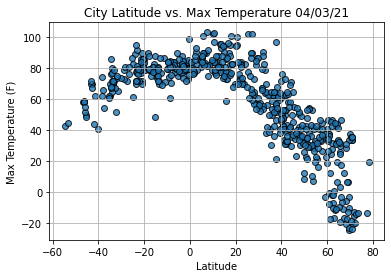

In [18]:
# Import the time module
import time

# Build the scatter plot for latitude vs max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8,
            label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

## 6.3.2 Plot Latitude vs Humidity

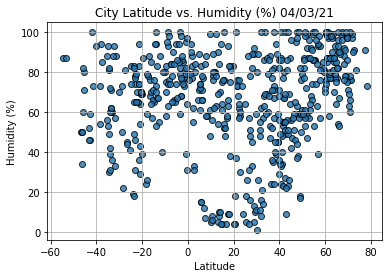

In [23]:
# Build the scatter plot for latitude vs humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8,
            label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity (%) "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

## 6.3.3 Plot Latitude vs. Cloudiness

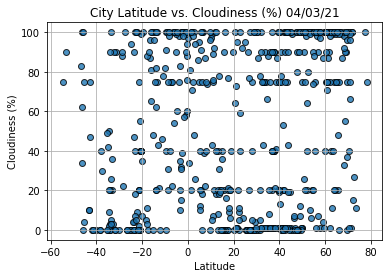

In [24]:
# Build the scatter plot for latitude vs cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8,
            label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

## 6.3.4 Plot Latitude vs. Wind Speed

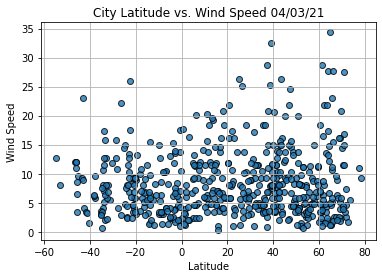

In [25]:
# Build the scatter plot for latitude vs wind_speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8,
            label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

## 6.4.1 Use Linear Regression to Find the Relationship Between Variables

## 6.4.2 Find the Correlation Between Latitude and Maximum Temperature

In [40]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values,label="Cities")
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.legend()
    plt.grid(True)
    
    plt.show()

In [27]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

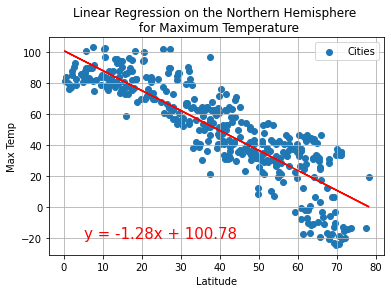

In [61]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(5,-20))

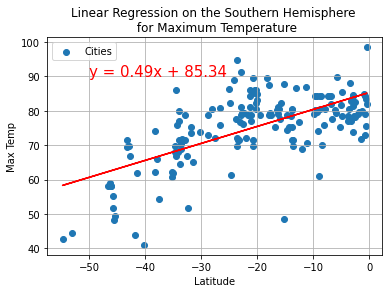

In [60]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,90))

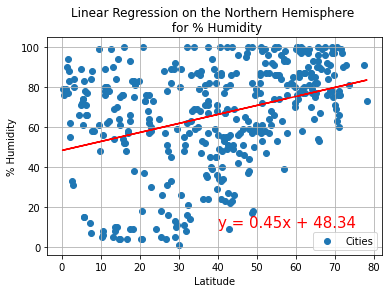

In [59]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))

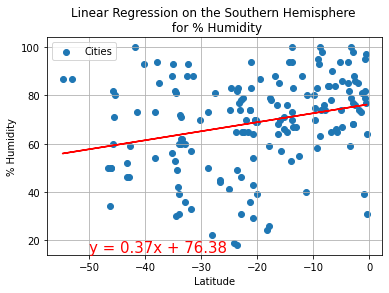

In [56]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,15))

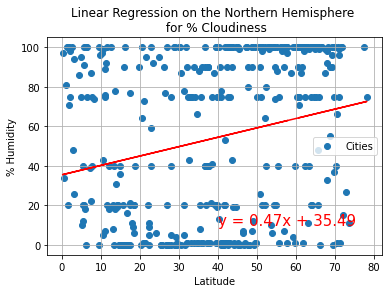

In [62]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Humidity',(40,10))

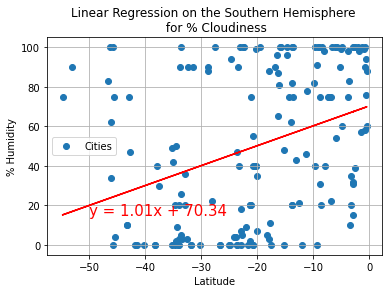

In [63]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Humidity',(-50,15))

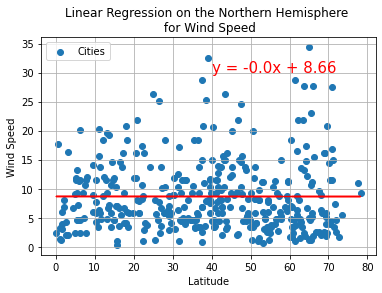

In [69]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,30))

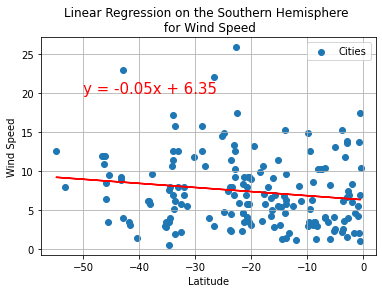

In [71]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,20))